In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
0   52    1   0       125   212    0        1      168      0      1.0      2  \
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
0   52    1   0       125   212    0        1      168      0      1.0      2  \
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

# Exploratory Data Analysis

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
categorical_vars = ["sex", "cp", "fbs","restecg", "exang", "slope", "ca", "thal"]
numerical_vars = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# remove rows with wrong values for "ca" and "thal"
df.drop(df[df["ca"] == 4].index, inplace=True)
df.drop(df[df["thal"] == 0].index, inplace=True)

In [11]:
df.describe()

age          sex           cp     trestbps         chol   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  \
mean     54.607000     0.691000     0.934000   131.592000   246.996000   
std       9.037822     0.462312     1.031847    17.714326    51.700802   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.500000   
75%      61.000000     1.000000     2.000000   140.000000   277.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs     restecg      thalach        exang      oldpeak   
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000  \
mean      0.146000     0.52400   148.977000     0.338000     1.092400   
std       0.353283     0.52887    23.083139     0.473265     1.180727   
min       0.000000     0.00000    71.000000     0.000000     0.000000   
25%       0.000000     0.00000   132.000000     0.000000     0.000000   
50%       0.000000     1.00000   152.000000     0.000000     0.800000   
75%       0.000000     1.00000   165.000000     1.000000     1.800000   
max       1.000000     2.00000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean      1.381000     0.701000     2.339000     0.508000  
std       0.619857     0.944718     0.593659     0.500186  
min       0.000000     0.000000     1.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     3.000000     3.000000     1.000000

In [12]:
#Numerical features behaviour with target value

In [13]:
df[["target","age"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

target        age
0       0  56.689024
1       1  52.590551

In [14]:
df[["target","trestbps"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

target    trestbps
0       0  134.168699
1       1  129.096457

In [15]:
df[["target","thalach"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

target     thalach
0       0  138.969512
1       1  158.669291

In [16]:
df[["target","chol"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

target        chol
0       0  251.703252
1       1  242.437008

In [17]:
df[["target","oldpeak"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

target   oldpeak
0       0  1.614228
1       1  0.587008

Mean of the numerical variables are different correspoding with their target values. Therefor they can help the prediction process.

# Detecting Outliers

In [18]:
from collections import Counter
outlier_indices = []

for i in numerical_vars:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75) 
    IQR = Q3 - Q1 
    
    outlier_step = IQR * 1.5 
    outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col) 

outlier_indices = Counter(outlier_indices)
multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2) 
    
print(multiple_outliers)

[]


# Data Visualization

# Target Value Visualization

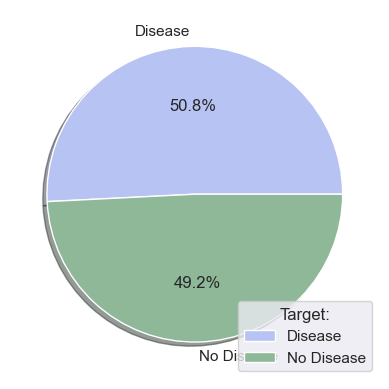

In [19]:
plt.pie(df["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3",  "#8EB897"])
plt.legend(title = "Target:")
plt.show()

Dataset is balanced when compared with the target value

# Categorical Variables Visualization

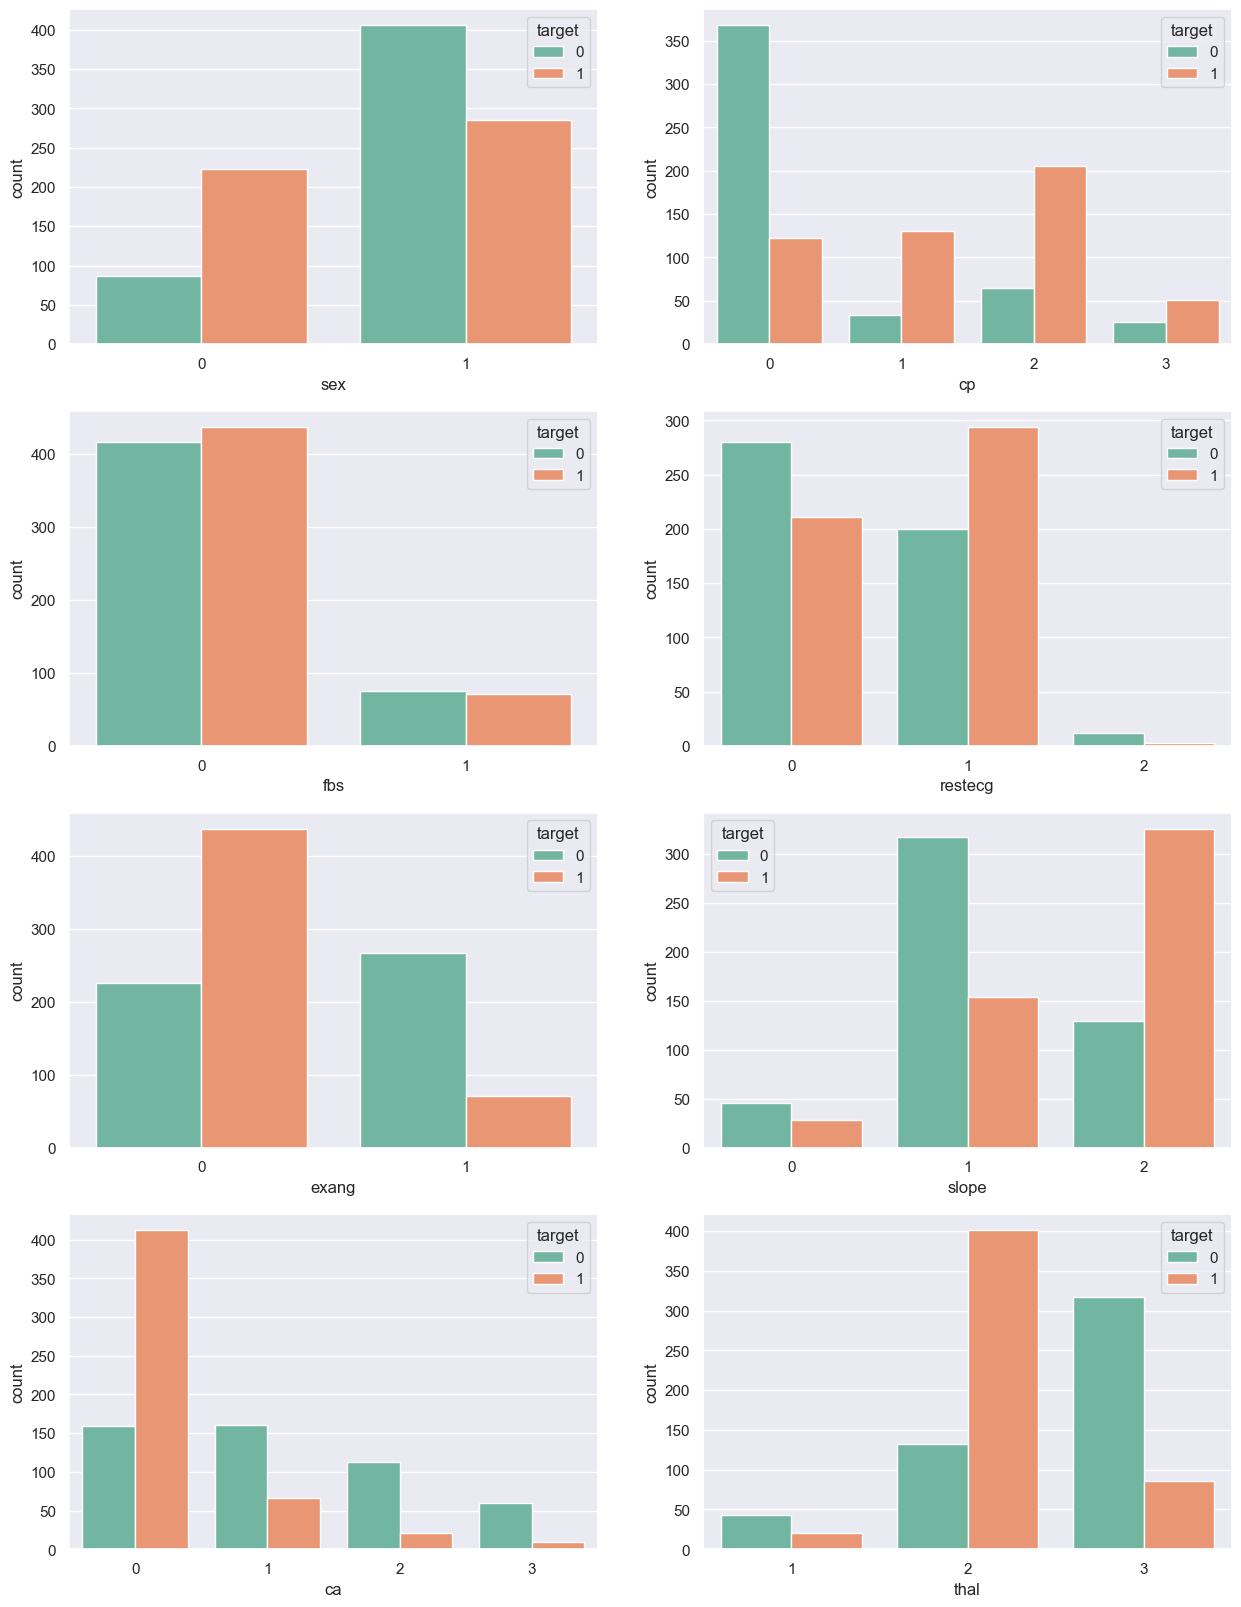

In [20]:
i = 0
plt.figure(figsize=(15,20))

for categorical_feature in categorical_vars:
    i += 1
    plt.subplot(4, 2, i)
    sns.countplot(x = df[categorical_feature], data = df, hue = "target", palette = "Set2")

plt.show()

•	Women have a higher risk of heart disease compared to men. 
•	The presence of typical angina (cp) in a patient indicates a very low risk of heart disease. 
•	Fasting blood sugar (fbs) may not be a significant factor in determining heart disease risk. 
•	Patients with a restecg reading of 1 have a higher incidence of heart disease compared to those with a reading of 0. There is not enough data on restecg reading 2 to draw a definitive conclusion. 
•	Patients without exercise-induced angina (exang = 0) have a higher incidence of heart disease compared to those with exang = 1. 
•	Patients with a slope of 2 (slope = 2) on their ECG test have a higher incidence of heart disease compared to those with a slope of 1 (slope = 1). 
•	The number of major vessels colored by fluoroscopy (ca) is an important factor in determining heart disease risk, with a significant difference between patients with ca = 0 and those with ca = 1,2,3. 
•	Patients with a thalassemia reading of 2 (thal = 2) have a higher incidence of heart disease compared to those with a reading of 3 (thal = 3).


# Numerical Variables Visualization

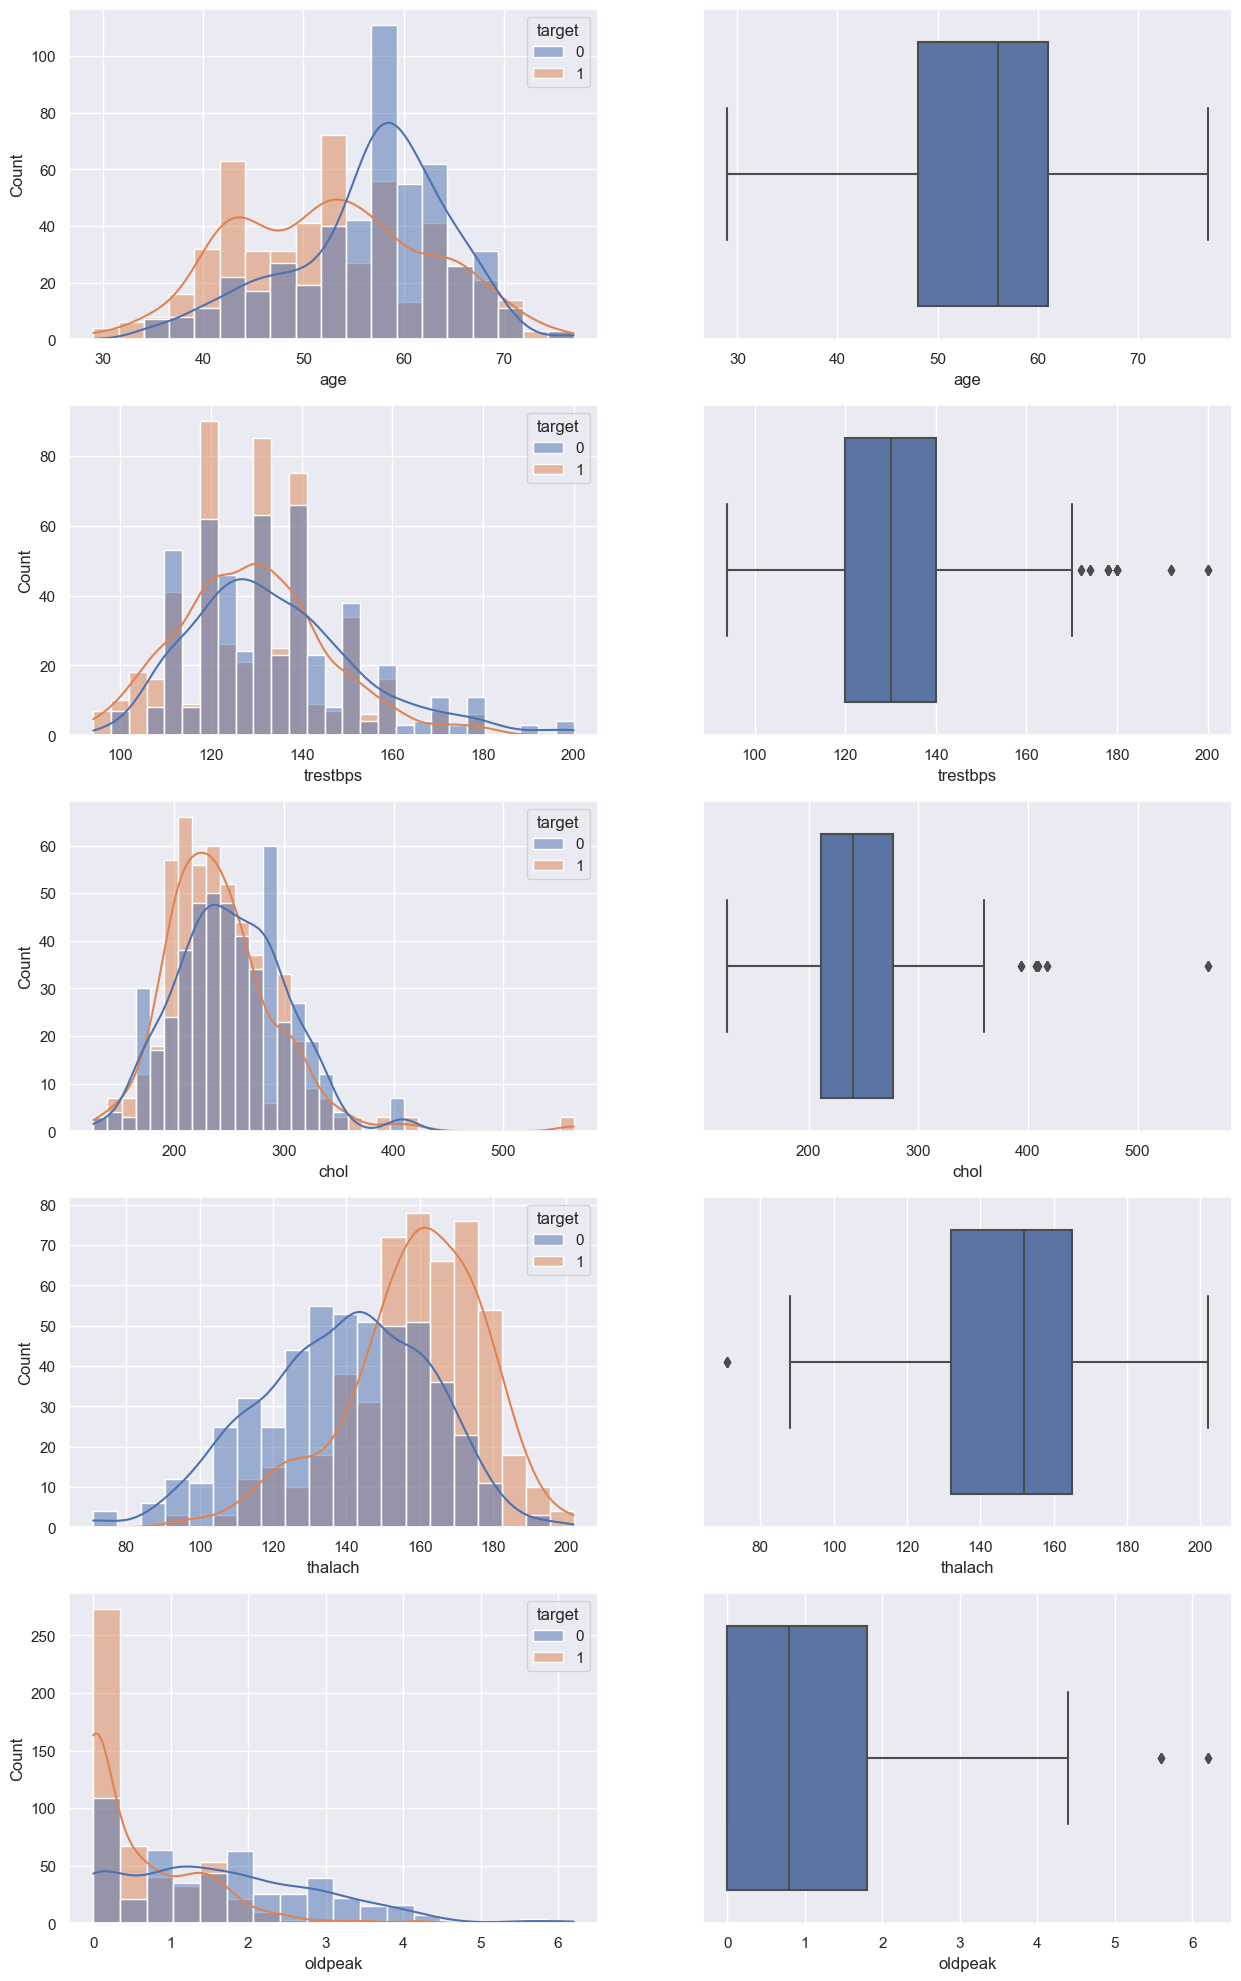

In [21]:
i = 0
plt.figure(figsize=(15,30))

for numerical_feature in numerical_vars:

    i += 1
    plt.subplot(6, 2, i)
    sns.histplot(x = df[numerical_feature], data = df, kde = True, hue = "target")

    i += 1
    plt.subplot(6, 2, i)
    sns.boxplot(x = df[numerical_feature], data = df)
    
plt.show()

Data for oldpeak was found to be imbalanced. Some outliers were observed but we have already examined this situation in outlier detection.

# Correlation Matrix

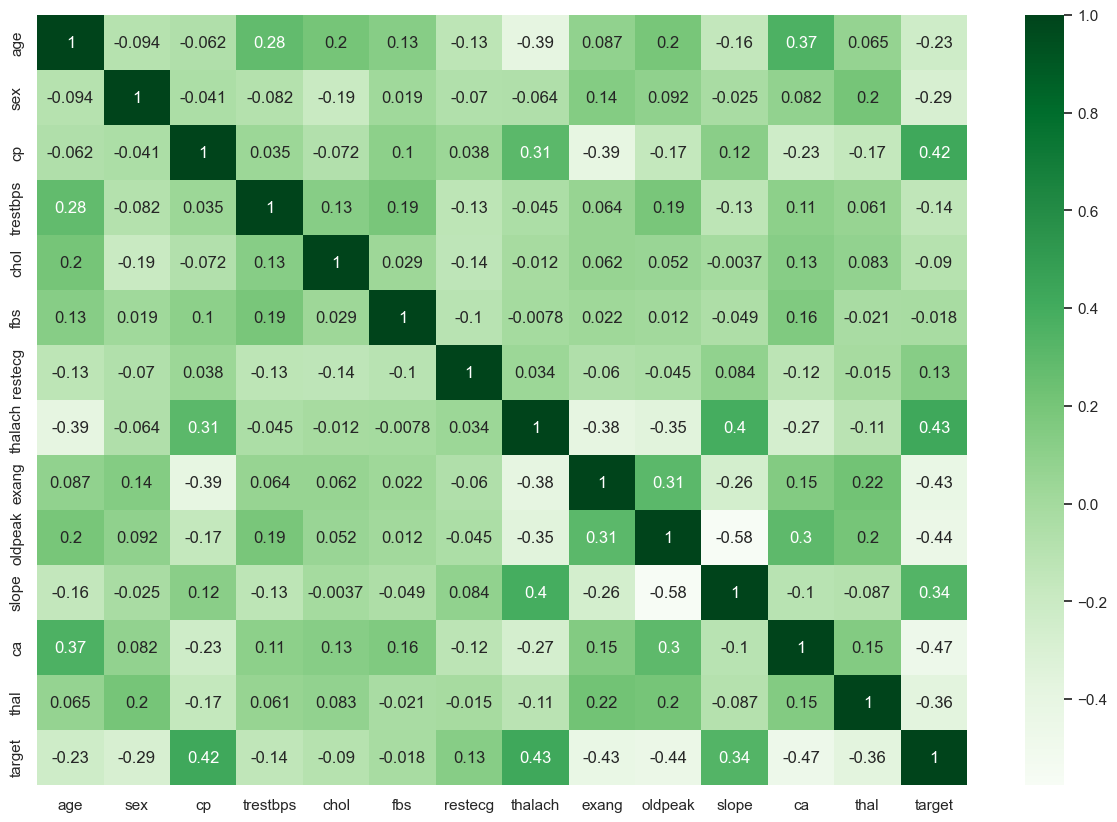

In [22]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Greens")

plt.show()

# Data Preprocessing

In [23]:
# Categorical features preprocessing
df = pd.get_dummies(df, columns = categorical_vars)

# Numerical feature scaling
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

In [24]:
df.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1   
0 -0.288599 -0.372314 -0.677233  0.824520 -0.078296       0  False   True  \
1 -0.177897  0.474882 -0.851399  0.261057  1.701159       0  False   True   
2  1.704028  0.757280 -1.412599 -1.039243  1.277479       0  False   True   
3  0.707715  0.926719 -0.851399  0.521117 -0.925656       0  False   True   
4  0.818416  0.361922  0.909609 -1.862767  0.684328       0   True  False   

   cp_0   cp_1  ...  slope_0  slope_1  slope_2   ca_0   ca_1   ca_2   ca_3   
0  True  False  ...    False    False     True  False  False   True  False  \
1  True  False  ...     True    False    False   True  False  False  False   
2  True  False  ...     True    False    False   True  False  False  False   
3  True  False  ...    False    False     True  False   True  False  False   
4  True  False  ...    False     True    False  False  False  False   True   

   thal_1  thal_2  thal_3  
0   False   False    True  
1   False   False    True  
2   False   False    True  
3   False   False    True  
4   False    True   False  

[5 rows x 29 columns]

# Modeling

# Splitting the Data

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [26]:
# Create variables for feature data and target values

X = df.drop(["target"], axis=1) # feature data
y = df["target"].values # target values

In [27]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


In [28]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


# Model Training and Parameter Tuning

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Set the random seed
random_state = 128 

# Define the machine learning model
model = LogisticRegression(random_state = random_state)
         
         
# Define the list of class name
model_name = "LogisticRegression"

# Define the hyperparameter grid
lr_params = {"C": [0.1, 1, 10, 100], 
             "penalty": ["l2"]} 

# Define  hyperparameter grid
param_grids = lr_params


In [31]:
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Machine Learning Models: LogisticRegression
Cross Validation Scores: [0.8671428571428571]
Best Parameters: [LogisticRegression(C=0.1, random_state=128)]

-----------------------------------------------------

Train Accuracy of Classifier:  0.8685714285714285
Test Accuracy of Classifier:  0.87
The F1 Score of Classifier:  0.8704318936877077

-----------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       159
           1       0.82      0.93      0.87       141

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


-----------------------------------------------------

ROC Curve: 



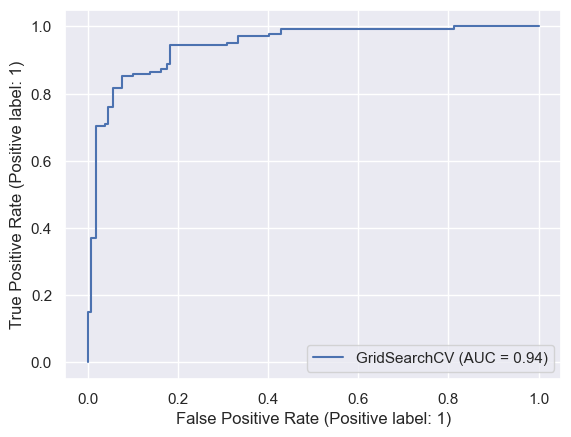


-----------------------------------------------------

Confusion Matrix: 



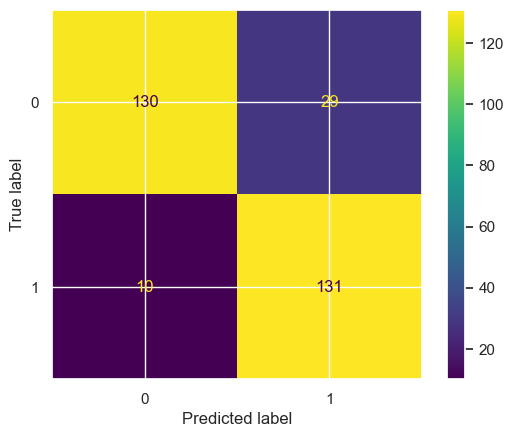


****************************************************************

LogisticRegression Model Accuracy is 87.00%


In [32]:
cv_result = []
best_estimators = []

# Define the stratified K-fold cross-validation scheme
cv = StratifiedKFold(n_splits = 5)

# Define the grid search strategy
clf = GridSearchCV(model, 
                   param_grid=param_grids, 
                   cv = cv, 
                   scoring = "accuracy", 
                   n_jobs = -1,
                   verbose = 1)
    
# Print the cross validation score, best parameters and the train and test accuracy of the model
clf.fit(X_train,y_train)
cv_result.append(clf.best_score_)
best_estimators.append(clf.best_estimator_)

print("Machine Learning Models:", model_name)
print("Cross Validation Scores:", cv_result)
print("Best Parameters:", best_estimators)
print("\n-----------------------------------------------------\n")

print("Train Accuracy of Classifier: ", accuracy_score(clf.predict(X_train),y_train))
print("Test Accuracy of Classifier: ", accuracy_score(clf.predict(X_test),y_test))
print("The F1 Score of Classifier: ", f1_score(clf.predict(X_test), y_test))
print("\n-----------------------------------------------------\n")

# Print the classification report and plot the ROC curve and confusion matrix
print("Classification Report: \n", classification_report(y_test, clf.predict(X_test)))
print("\n-----------------------------------------------------\n")

print("ROC Curve: \n")
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()
print("\n-----------------------------------------------------\n")

print("Confusion Matrix: \n")
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()
print("\n****************************************************************\n")

a = accuracy_score(clf.predict(X_test),y_test)   
print(model_name,f'Model Accuracy is {a*100:.2f}%')

# Model Evaluation

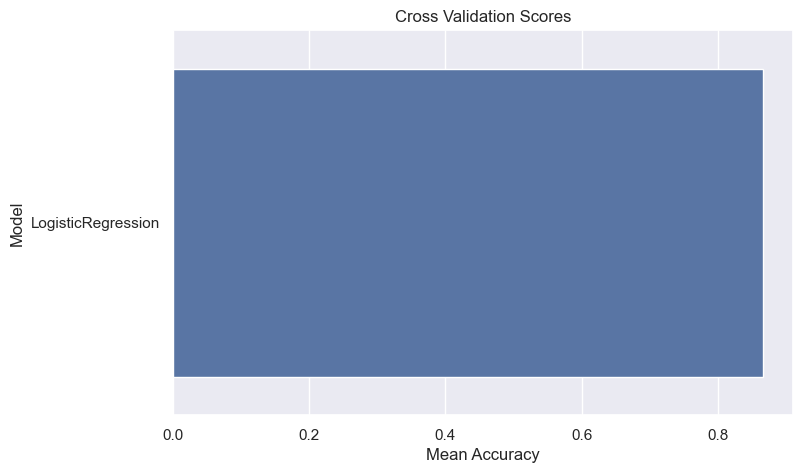

In [33]:
# Create dataframe with mean accuracy score of the model
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, 
                           "Model":["LogisticRegression",
                                   ]}).sort_values(by="Cross Validation Means")

# Create barplot to visualize mean accuracy scores for each model
plt.figure(figsize=(8,5))
g = sns.barplot(x="Cross Validation Means", y="Model", data = cv_results)

# Set x-axis label and plot title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Display plot
plt.show()